# Sklopljeni oscilatorji

Sklopljeni Kuramoto oscilatorji so modeli, ki opisujejo **sinhronizacijo nelinearnih nihajnih sistemov** v fizičnih in družbenih kontekstih. To so sistem nihajnih enot, ki so sklopljene preko nekakšne mreže povezav, ki vplivajo na njihovo dinamiko. Vsaka enota ima lastno frekvenco, ki se lahko razlikuje od frekvenc drugih enot, vendar se zaradi sklopitve lahko sinhronizirajo in izkažejo **koordinirano dinamiko**.

Kuramoto model je predlagal japonski matematik **Yoshiki Kuramoto** leta 1975 kot model **sinhronizacije oscilatorjev v bioloških sistemih**. Danes se ta model uporablja v različnih področjih, kot so fizika, biologija, socialne inženirske vede in računalništvo.

Matematična definicija problema sklopljenih Kuramoto oscilatorjev je sledeča:
Naj bodo $N$ oscilatorji s fazami $\theta_1, \theta_2, ..., \theta_N$ in frekvencami $\omega_1, \omega_2, ..., \omega_N$. Dinamika oscilatorja $i$ je opisana z naslednjo diferencialno enačbo:


$$\frac{d \theta_i}{dt} = \omega_i + \epsilon \frac{k_i}{N} \sum_{j=1}^{N} \sin(\theta_j-\theta_i)$$

kjer je $\epsilon$ sklopitveni parameter, ki določa moč sklopitve med enotami. Sinusni izraz opisuje vpliv drugih enot na dinamiko vsake posamezne enote.
Cilj je najti stabilne rešitve za fazne razlike $\Delta_{ij} = \theta_i - \theta_j$ za vsako kombinacijo oscilatorjev, ki izpolnjujejo pogoj sinhronizacije, ki je definiran kot:

$$\lim_{t \rightarrow \infty} = \Delta_{ij} (t) = 0,$$


kjer je $\Delta_{ij}(t) = \theta_i(t) - \theta_j(t)$ fazna razlika med oscilatorjema $i$ in $j$. Raziskovanje sklopljenih Kuramoto oscilatorjev je pomembno, saj lahko pomaga razumeti, kako se sinhronizacija pojavi v različnih sistemih, kot so možganske mreže, celične avtomate in socialne mreže. Poleg tega se uporablja tudi v računalniški znanosti, na primer pri optimizaciji procesov distribuirane obdelave podatkov.


## Sinhronizacija


Stopnja usklajenosti (angl. "synchronization") dinamike Kuramoto sistema se običajno meri s pomočjo fazne urejenosti (angl. "phase coherence") med oscilatorji. Slednja pove, kako podobne so faze posameznih oscilatorjev med seboj ob določenem času.

Ena od najbolj uporabljenih mer faznega urejanja v Kuramoto sistemih je parameter ordere parameter (angl. "order parameter") $R$, ki je definiran kot:

$$R e^{i \Psi} = \frac{1}{N}\sum_{j=1}^{N}e^{i \theta_j}$$

kjer je $N$ število oscilatorjev, $\theta_j$ pa je trenutna faza $j$-tega oscilatorja. Parameter $R$ meri stopnjo urejanja faz v sistemu in ima vrednost med 0 in 1, kjer 0 pomeni popolno neskladnost faz med oscilatorji, medtem ko 1 pomeni popolno usklajenost faz.

Poleg parametra $R$ se pogosto uporabljajo tudi druge mere faznega urejanja, kot so npr. globalna fazna varianca (angl. "global phase variance"), fazni difuzijski koeficient (angl. "phase diffusion coefficient"), ipd. Ti parametri lahko v različnih okoliščinah ali pri različnih vrstah problemov ponudijo različne informacije o stopnji urejanja v Kuramoto sistemu.


## Branje:
- [Difuzivna sklopitev](https://www.sciencedirect.com/science/article/abs/pii/S0960077914001441?via%3Dihub)

- [Rulkova mapa](https://www.frontiersin.org/articles/10.3389/fphys.2019.00869/full)

- [Kuramoto oscilatorji](https://pubs.aip.org/aip/cha/article/32/9/093119/2835941/A-global-synchronization-theorem-for-oscillators)

- [Naključni mrežni model](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html)

In [4]:
import numpy as np
from numpy import random
import networkx as nx
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm.auto import tqdm,trange
from IPython.display import clear_output
from matplotlib.patches import Circle

print(nx.__version__)

2.8


In [2]:
def coupling_2(theta, A, eps, N):
    c=np.zeros(N)
    for i in range(N):
        for j in range(N):
            if A[i,j] == 1:
                c[i] += np.sin(theta[j] - theta[i])
        c[i]=eps*c[i]
    return c
                
    c=(A@np.sin(theta-theta[:,np.newaxis]).sum(axis=1)).A[0]
    cc=(eps * A.sum(axis=1) / N).T.A[0]
    return c*cc

def coupling(theta, A, eps, N):
    print("theta",theta.shape,"A",A.shape,"eps",eps,"N",N)
    c = (A @ np.sin(theta - theta.reshape(N, 1))).sum(axis=1)
    return c*eps

def compute_order_parameter(theta):
    N = len(theta)
    r = np.abs(np.mean(np.exp(1j*theta)))
    return r

def simumaltion(N, tmax, dt, A, eps, t, w, theta, plot=False,norm=False):
    """_summary_

    Args:
        N (_type_): _description_
        tmax (_type_): _description_
        dt (_type_): _description_
        A (_type_): _description_
        eps (_type_): _description_
        t (_type_): _description_
        w (_type_): _description_
        theta (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
        norm (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """
    
    # Simulate the system
    r_hist = np.zeros(len(t))
    #!!!!!!!!!!!!!!!!!!!!#
    theta_hist = np.zeros((len(t), N))
    theta_hist[0] = theta
    r=compute_order_parameter(theta_hist[0])
    for i in trange (1, len(t), desc=f"r = {r:.2}", leave=False):
        #RK4
        k1 = dt * (coupling_2(theta, A, eps, N) + w)
        k2 = dt * (coupling_2(theta + k1/2, A, eps, N) + w)
        k3 = dt * (coupling_2(theta + k2/2, A, eps, N) + w)
        k4 = dt * (coupling_2(theta + k3, A, eps, N) + w)
        theta = (theta + (1/6)*(k1 + 2*k2 + 2*k3 + k4))
        if norm:
            theta=theta %(2*np.pi)
            theta_hist[i,:] = theta
        else:
            theta_hist[i,:] = theta
        
        #dtheta = w + coupling_2(theta, A, eps, N)
        #theta = theta + dt * dtheta
        #theta_hist[i] = theta
        
        r = compute_order_parameter(theta_hist[i])
        r_hist[i] = r
    
    if plot:
        fig, ax = plt.subplots(1, 3, figsize=(17,5), dpi=99)

        ax[0].imshow(A,interpolation='none',cmap='Greys',origin='lower')
        ax[0].set_xticks([i for i in range(0,A.shape[0],10)])
        ax[0].set_yticks([i for i in range(0,A.shape[0],10)])
        ax[0].set_xticklabels([str(i) for i in range(0,A.shape[0],10)], fontsize=6)
        ax[0].set_yticklabels([str(i) for i in range(0,A.shape[1],10)], fontsize=6)
        
        # Plot the results
        for i in range(N):
            ax[1].plot(t, theta_hist[:, i])
        ax[1].set_xlabel('Time')
        ax[1].set_ylabel('Phase')
        
        # Plot order parameter over time
        ax[2].plot(t, r_hist)
        ax[2].set_xlabel('Time')
        ax[2].set_ylabel('Order parameter')
        plt.show()
    return theta_hist,np.mean(r_hist)

k_avg = 2.90


r = 0.16:   0%|          | 0/4999 [00:00<?, ?it/s]

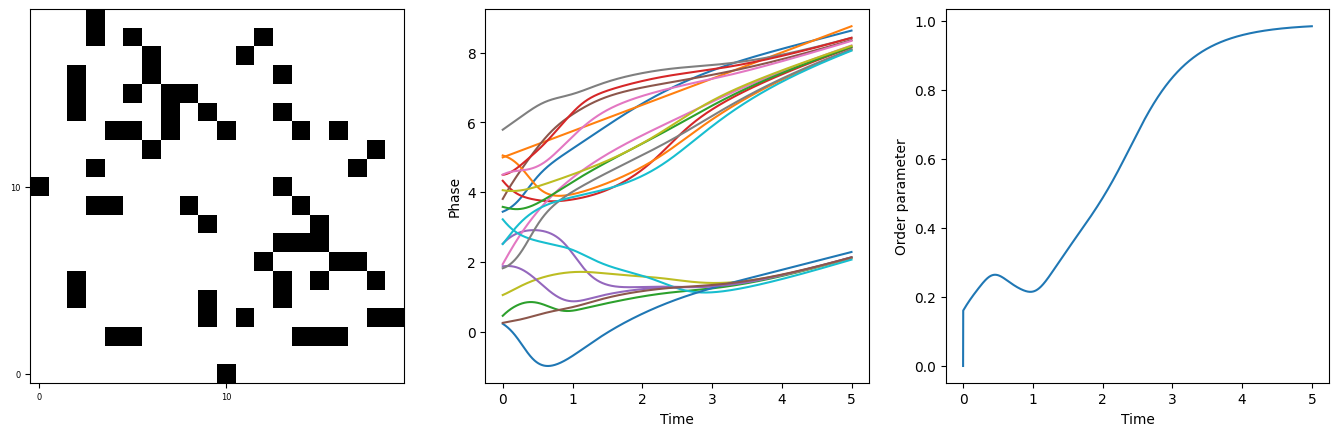

In [8]:
#Parametri simulacije
N = 20   # Število oscilatorjev
frac=0.2 #Delež vozlišč s katerimi je povezano posamezeno vozlišče
k_avg=(int)(frac*N)   # Povprečno število sosedov
eps= 2.0     # Sklopitev
dt = 0.001    # Integracijski korak
tmax = 5.0   # Čas trajanja simulacije


theta = np.random.uniform(0, 2*np.pi, N)    # Začete faze oscilatorjev
#w = np.random.normal(0, 1, N)               # Lastne frekvence oscilatorjev
periode=np.random.normal(loc=10, scale=1, size=N)
w =2*np.pi/periode
t = np.arange(0, tmax, dt)     # Polje časovnih točk


#Ustvarimo mrežo
G = nx.erdos_renyi_graph(N, k_avg/N)
print(f"k_avg = {np.mean([G.degree(i) for i in range(N)]):.2f}")

#G pretvorimo v matriko sosednjosti A
A = nx.to_numpy_matrix(G) #to_numpy_array v nx 3.1

theta_hist,r=simumaltion(N, tmax, dt, A, eps, t, w, theta,plot=True)

In [9]:
res_dict={}
for ieps in range(0,100,10):
    eps=ieps/100
    theta_hist,r=simumaltion(N, tmax, dt, A, eps, t, w, theta,plot=False)
    clear_output(wait=True)
    res_dict[eps]=r
    for key in res_dict.keys():
        print(f"eps = {key} | |r| = {res_dict[key]}")

eps = 0.0 | |r| = 0.18445026400195835
eps = 0.1 | |r| = 0.22221096498531479
eps = 0.2 | |r| = 0.24946185552690112
eps = 0.3 | |r| = 0.2504006615872924
eps = 0.4 | |r| = 0.22489226403250126
eps = 0.5 | |r| = 0.2101225096286622
eps = 0.6 | |r| = 0.217781903745179
eps = 0.7 | |r| = 0.23565500595542188
eps = 0.8 | |r| = 0.25808924860202426
eps = 0.9 | |r| = 0.28406155139747963


In [10]:
def update_plot(i):
    ax.clear()
    circle = Circle((0, 0), 1.0, facecolor='grey', edgecolor='black',linestyle='--', linewidth=1.5, alpha=0.5)
    ax.add_patch(circle)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_title(f'Time = {i*dt:.2f}')
    # Compute positions of oscillator points on unit circle
    x = np.cos(theta_hist[i,:])
    y = np.sin(theta_hist[i,:])
    # Plot oscillator points
    ax.scatter(x, y, color='blue', s=50)
    # Plot edges between connected oscillators
    for edge in G.edges():
        ax.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], color='gray')
    avg_x = np.mean(x)
    avg_y = np.mean(y)
    # Plot synchronization line
    ax.plot([0, avg_x], [0, avg_y], color='red', linestyle='-', linewidth=2.0)

  0%|          | 0/1000 [00:00<?, ?it/s]

Animation size has reached 20972111 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


IndexError: index 5000 is out of bounds for axis 0 with size 5000

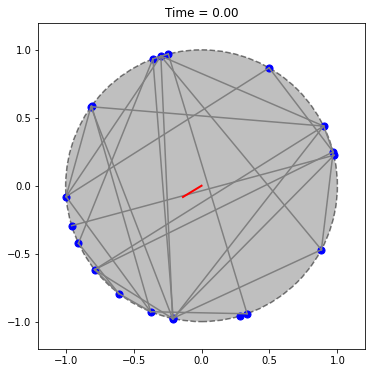

In [12]:
# Set up plot
fig, ax = plt.subplots(figsize=(6,6))
# Create animation
ani = FuncAnimation(fig, update_plot, frames=trange(0,10000,10), interval=30)
from IPython.display import HTML
HTML(ani.to_jshtml())

# Domača naloga

Uporabite model Morite, ki smo ga izdelali na vajah. In za enak nabor parametrov simulacije preverite, kako različne topologije vplivajo na fazno sinhronizacijo.

In [ ]:
ani.save('animation.mp4', writer='ffmpeg', fps=30)

In [24]:
A@w[0:10,np.newaxis]

matrix([[3.40249116],
        [1.32081705],
        [1.18031351],
        [1.98760491],
        [1.2740151 ],
        [1.2740151 ],
        [0.58771116],
        [1.82074728],
        [1.23210434],
        [3.03284233]])

In [27]:
AA=np.array([[1,1,0],[0,1,1],[1,1,1]])
theta=np.array([1,2,3])
print(theta.reshape(3, 1))
xx=theta-theta.reshape(3, 1)
print(xx.shape)
print(A.shape)
yy=A @ xx
print(yy)
def coupling(theta, A, eps, N):
    print("theta",theta.shape,"A",A.shape,"eps",eps,"N",N)
    c = (A @ np.sin(theta - theta.reshape(N, 1))).sum(axis=1)
    return c*eps

[[1]
 [2]
 [3]]
(3, 3)
(10, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 10)